In [140]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


In [141]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

display(data.head())
cleaned_data = data.copy()


/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_3288/1285417303.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)


,id,age,dist,income,gender,marital_status,target
0,1,73,4,10,1,0,1
1,2,89,1,11,1,1,1
2,3,85,1,2,0,0,1
3,4,76,2,10,1,1,1
4,5,76,2,2,1,0,1


preliminary plots, coorelation between predictors and responses to see if logistic regression is a suitibale candidate 

/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


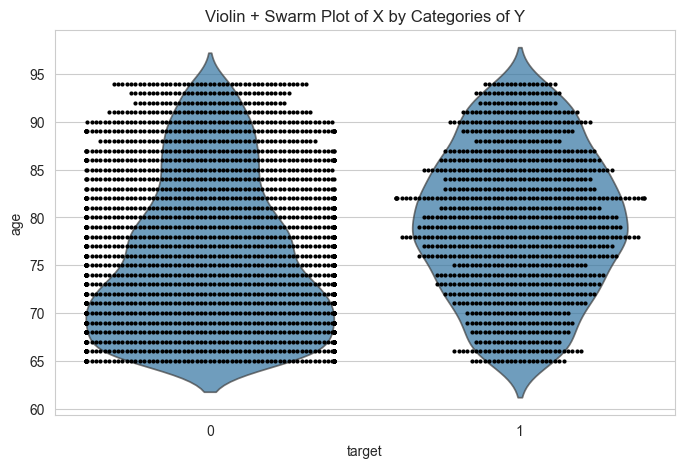

/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


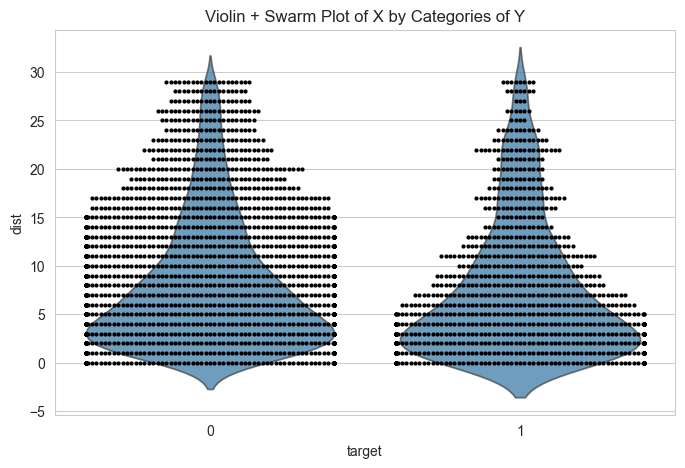

/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


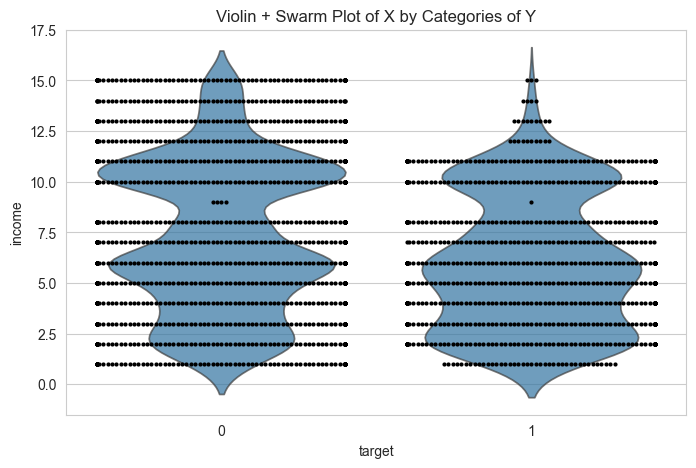

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = cleaned_data.copy()
df = df.sample(frac=1).reset_index(drop=True) # scramble the rows 

# Set a style for seaborn
sns.set_style("whitegrid")



# Combine a violin or box plot with a swarm plot for richer display
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='age', data=df, inner=None, alpha=0.7)  # semi-transparent
sns.swarmplot(x='target', y='age', data=df, color='black', size=3)
plt.title('Violin + Swarm Plot of X by Categories of Y')
plt.show()

# Combine a violin or box plot with a swarm plot for richer display
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='dist', data=df, inner=None, alpha=0.7)  # semi-transparent
sns.swarmplot(x='target', y='dist', data=df, color='black', size=3)
plt.title('Violin + Swarm Plot of X by Categories of Y')
plt.show()

# Combine a violin or box plot with a swarm plot for richer display
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='income', data=df, inner=None, alpha=0.7)  # semi-transparent
sns.swarmplot(x='target', y='income', data=df, color='black', size=3)
plt.title('Violin + Swarm Plot of X by Categories of Y')
plt.show()



what if we plotted the number of each outcome category by the continuous variable on x and the count of the outcome on the y-axis 

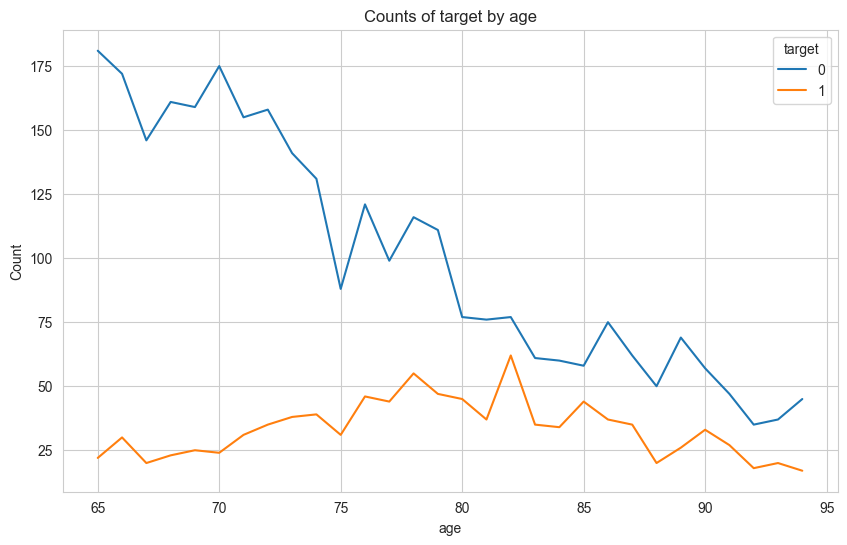

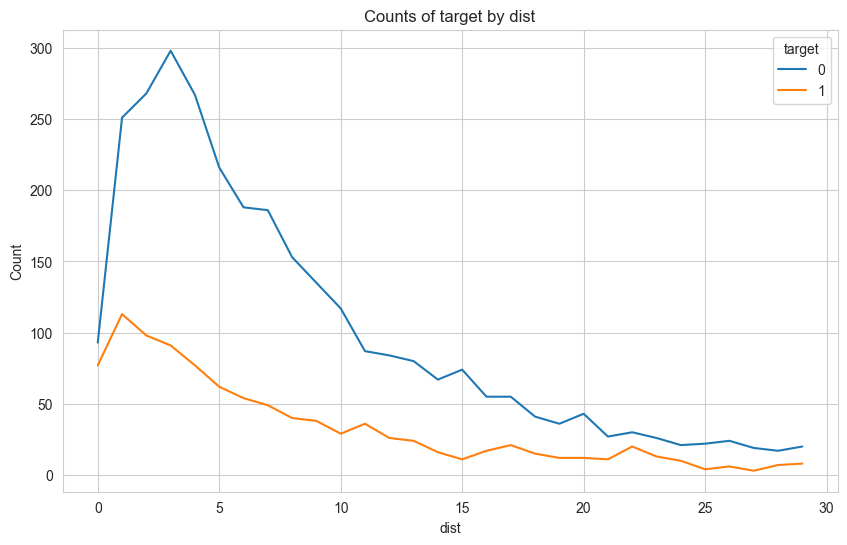

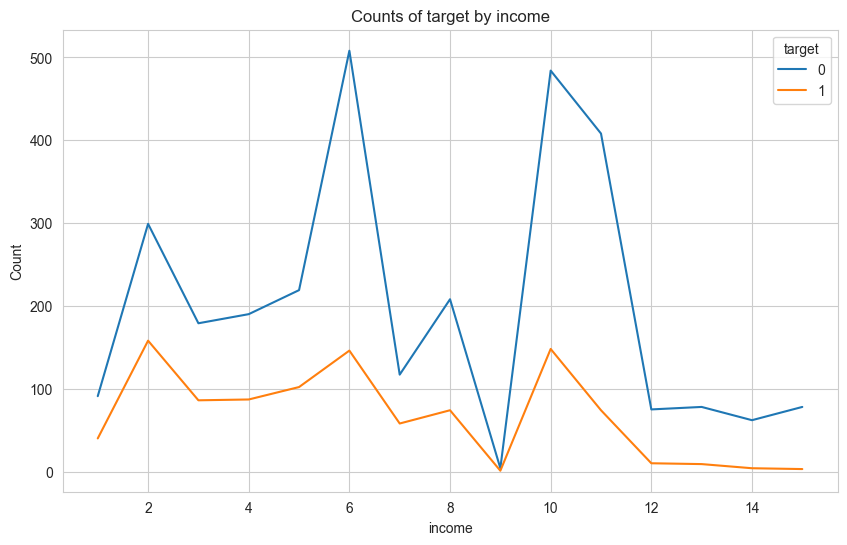

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For each continuous variable, we'll create a summarized DataFrame of counts by category
def plot_line_counts(df, continuous_var, categorical_var='target'):
    # Group by the continuous variable and the category, count how many rows fall into each group
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    
    # Plot a line for each category showing how counts change with the continuous variable
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=continuous_var, y='count', hue=categorical_var, data=grouped)
    plt.title(f'Counts of {categorical_var} by {continuous_var}')
    plt.xlabel(continuous_var)
    plt.ylabel('Count')
    plt.show()

# Assuming df and target, age, dist, income are defined:
plot_line_counts(df, 'age', 'target')
plot_line_counts(df, 'dist', 'target')
plot_line_counts(df, 'income', 'target')


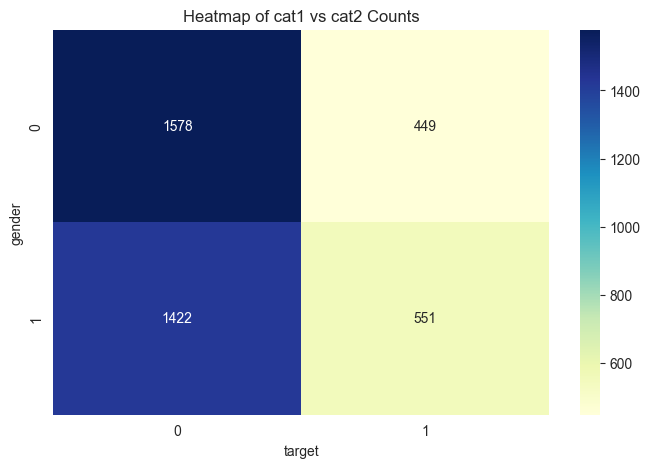

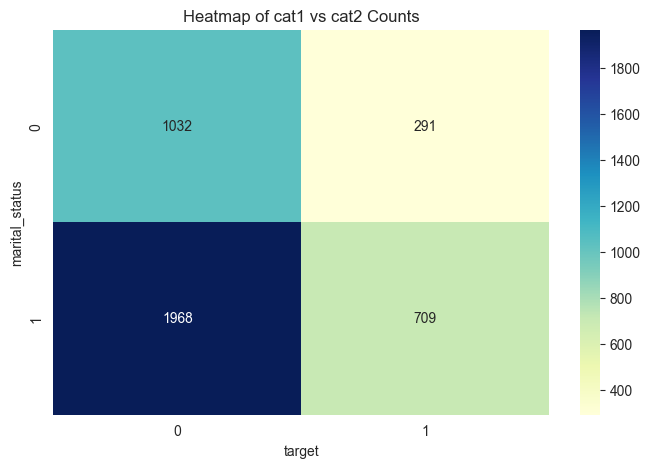

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table again
ct = pd.crosstab(df['gender'], df['target'])

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of cat1 vs cat2 Counts')
plt.ylabel('gender')
plt.xlabel('target')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table again
ct = pd.crosstab(df['marital_status'], df['target'])

plt.figure(figsize=(8, 5))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of cat1 vs cat2 Counts')
plt.ylabel('marital_status')
plt.xlabel('target')
plt.show()


All of our predictor variabels fail to demonstraight linear predictor and response relationship. We may therefore with certainty rule out Logistic Regression. 

Standardize our variables 

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['age', 'income', 'dist']] = scaler.fit_transform(data[['age', 'income', 'dist']])

data_standardized = data 

display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,-0.445587,-0.576729,0.836440,1,0,1
1,2,1.541145,-1.018667,1.113292,1,1,1
2,3,1.044462,-1.018667,-1.378378,0,0,1
3,4,-0.073074,-0.871354,0.836440,1,1,1
4,5,-0.073074,-0.871354,-1.378378,1,0,1


build a logistic regression model

split data into test and train 

In [144]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=123, stratify=data["target"])

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# train predictor and response 
x_train = train[['age', 'dist', 'income','gender','marital_status']] 
y_train = train['target']  



# test predictor and response
x_test = test[['age', 'dist', 'income','gender','marital_status']] 
y_test = test[['target']] 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 

y_pred = model.predict(x_test) # evaluate model on test predictors for predicted binary outcome 


confusion matrix at the default decision threshold of 0.50

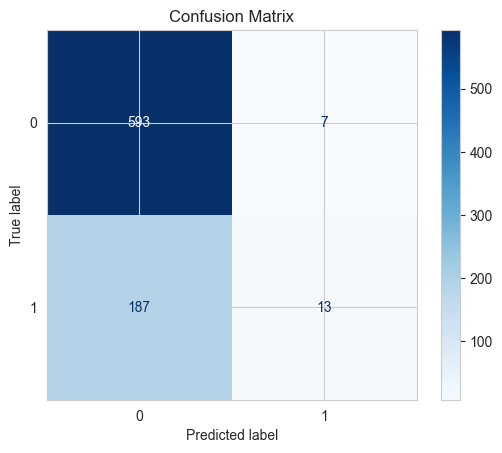

In [146]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()

ROC curve

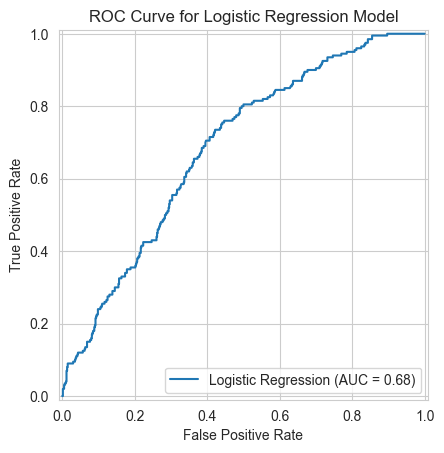

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Predict probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]  # Extract the probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC Curve using sklearn's built-in RocCurveDisplay
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name="Logistic Regression").plot()

# Show the plot
plt.title("ROC Curve for Logistic Regression Model")
plt.show()

Sensitivity and Specificity by decision threshold curves

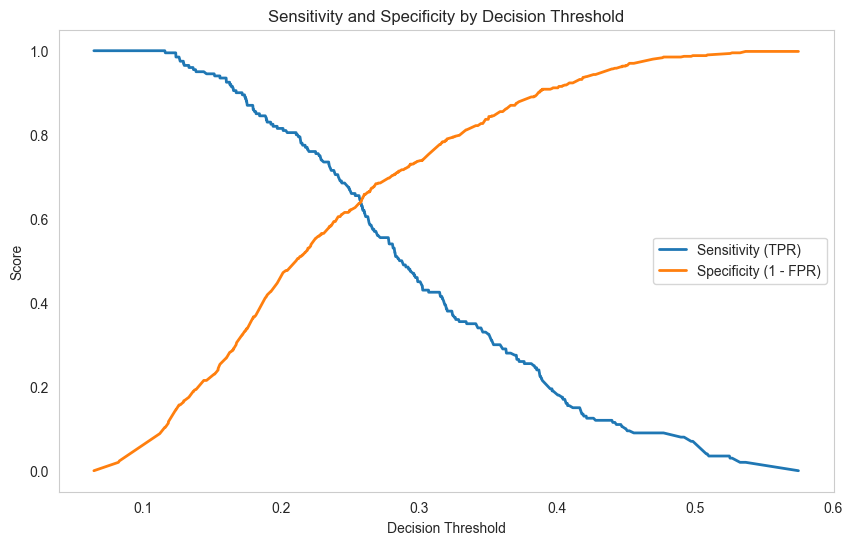

,fpr,tpr,decision_threshold
0,0.000000,0.00,inf
1,0.001667,0.00,0.574729
2,0.001667,0.02,0.536502
3,0.005000,0.02,0.532432
4,0.005000,0.03,0.526689


In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Predict probabilities for the positive class
y_probs = model.predict_proba(x_test)[:, 1]  # Extract probabilities for class 1

# Compute ROC curve to get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

KPI_by_threshold = pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'decision_threshold':thresholds
})

# Compute specificity (1 - FPR)
specificity = 1 - fpr

# Plot Sensitivity and Specificity vs. Decision Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tpr, label="Sensitivity (TPR)", linewidth=2)
plt.plot(thresholds, specificity, label="Specificity (1 - FPR)", linewidth=2)
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Sensitivity and Specificity by Decision Threshold")
plt.legend()
plt.grid()
plt.show()


display(KPI_by_threshold.head())

balenced decision threshold

In [149]:
# Compute specificity
specificity = 1 - fpr

# Calculate the absolute difference between sensitivity (tpr) and specificity
KPI_by_threshold['diff'] = abs(KPI_by_threshold['tpr'] - specificity)

# Find the threshold where the difference is minimized
optimal_index = KPI_by_threshold['diff'].idxmin()
optimal_threshold = KPI_by_threshold.loc[optimal_index, 'decision_threshold']

print("Decision Threshold where Sensitivity and Specificity intersect:", optimal_threshold)

Decision Threshold where Sensitivity and Specificity intersect: 0.2578228307110478


confusion matrix at that decision threshold 

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       600
           1       0.37      0.64      0.47       200

    accuracy                           0.64       800
   macro avg       0.61      0.64      0.60       800
weighted avg       0.72      0.64      0.66       800



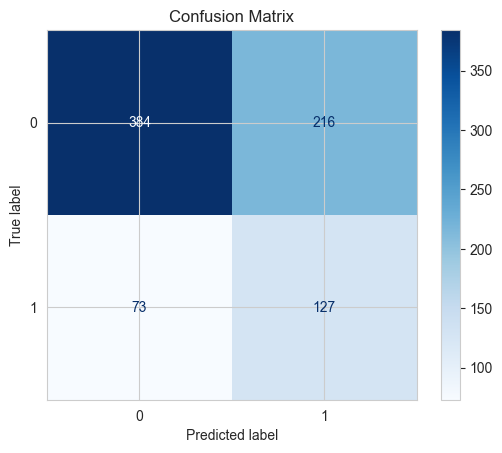

In [150]:
y_probs = model.predict_proba(x_test)[:, 1]  #  probabilities of posative class 

custom_threshold = optimal_threshold

y_pred_custom = (y_probs >= custom_threshold).astype(int) # true --> 1, false --> 0 

print(classification_report(y_test, y_pred_custom))

cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
import matplotlib.pyplot as plt
plt.title("Confusion Matrix")
plt.show()

LIFT chart - evaluated on testing data 

,id,age,dist,income,gender,marital_status,target,y_probs
0,1503,-1.066441,0.749085,-0.270969,0,0,0,0.123805
1,1329,-1.438953,0.749085,0.282735,0,1,0,0.124952
2,2852,-1.438953,0.159834,0.282735,0,0,0,0.093425
3,374,-0.569758,-0.429416,0.836440,1,0,0,0.150199
4,2233,-0.569758,-0.576729,-1.655230,0,0,0,0.244902


,id,age,dist,income,gender,marital_status,target,y_probs
0,3918,2.161999,-1.018667,-1.378378,1,1,0,0.632060
1,2394,2.161999,-0.871354,-1.378378,1,1,1,0.629666
2,443,2.161999,-0.724042,-1.378378,1,1,1,0.627266
3,863,1.665316,-0.871354,-1.655230,1,1,0,0.614886
4,461,1.913658,-1.018667,-1.378378,1,1,1,0.611432


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,15.5,8.7,6.8
2,31.9,20.1,11.8
3,46.2,29.8,16.4
4,59.9,38.9,21.0
5,71.4,49.2,22.2
6,79.0,59.3,19.7
7,85.2,68.4,16.8
8,92.2,78.2,14.0
9,97.3,89.1,8.2


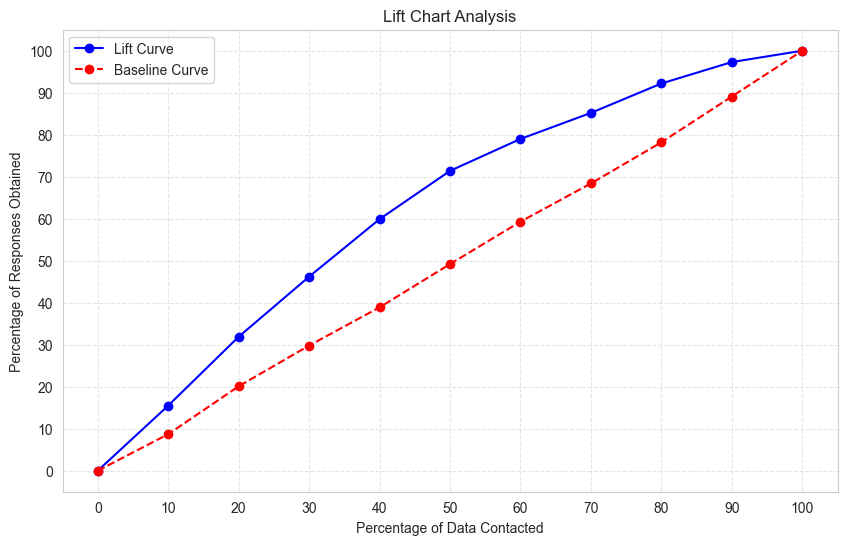

In [151]:
data = data.sample(frac=1).reset_index(drop=True)
data['y_probs'] = model.predict_proba(data[['age', 'dist', 'income','gender','marital_status']])[:, 1]  # Extract the probabilities for class 1
data_sorted = data.sort_values(by='y_probs', ascending=False).reset_index(drop=True)
display(data.head())
display(data_sorted.head())


import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lift_chart(data_sorted, data):
    """
    Computes and plots the lift chart and baseline curve.

    Parameters:
    - data_sorted: DataFrame sorted by predicted probabilities (descending order)
    - data: Original DataFrame for baseline curve computation

    Returns:
    - lift_chart_data: DataFrame containing the lift and baseline curve values
    """
    # Step 1: Total number of positive responses
    sum_responses = data_sorted['target'].sum()

    # Step 2: Initialize lists for lift curve and baseline curve
    lift_curve = []
    baseline_curve = []

    # Step 3: Compute lift and baseline curves across 0%-100% (in 10% increments)
    n_rows = len(data_sorted)

    for i in range(11):  # i from 0 to 10
        cutoff = int((i / 10) * n_rows)  # Calculate the number of rows for the given percentile
        
        # Lift Curve: Percentage of positive responses in top percentile
        lift_percentage = data_sorted.iloc[:cutoff]['target'].sum() / sum_responses * 100
        lift_curve.append(lift_percentage)
        
        # Baseline Curve: Random sampling of the same size from unsorted data
        baseline_percentage = data.iloc[:cutoff]['target'].sum() / sum_responses * 100
        baseline_curve.append(baseline_percentage)

    # Step 4: Create a DataFrame to store lift and baseline curves
    lift_chart_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline Curve': baseline_curve
    })

    lift_chart_data['diff'] = lift_chart_data['Lift Curve'] - lift_chart_data['Baseline Curve']

    # Step 5: Display the resulting lift chart data
    print("Lift Chart Data:")
    display(lift_chart_data)

    # Step 6: Plot the Lift and Baseline curves
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_chart_data['Lift Curve'], label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_chart_data['Baseline Curve'], label='Baseline Curve', color='red', linestyle='--', marker='o')

    # Customize the plot
    plt.title('Lift Chart Analysis')
    plt.xlabel('Percentage of Data Contacted')
    plt.ylabel('Percentage of Responses Obtained')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


lift_chart(data_sorted, data)


It seems our Logistic Regression model is performing very poorly at positive classification by our lift chart despite it's overall accuracy being similar to RF, I expect this is due to the models bias towards Specificity than Sensetivity. 

To further our goal of developing the best model, we will see if we can further optimise the fit of our Logistic Regression model by any and all means, rather than divide our focus into optimising multiple modeling algorithms.  
























Experiment 1: What if we trained the model on Standardized, then evaluated on non-standardized data. 

train on standardized data, evaluate on standardized data 

,id,age,dist,income,gender,marital_status,target
0,1,-0.445587,-0.576729,0.836440,1,0,1
1,2,1.541145,-1.018667,1.113292,1,1,1
2,3,1.044462,-1.018667,-1.378378,0,0,1
3,4,-0.073074,-0.871354,0.836440,1,1,1
4,5,-0.073074,-0.871354,-1.378378,1,0,1


,id,age,dist,income,gender,marital_status,target,y_probs
0,379,-1.066441,1.632961,0.005883,0,1,0,0.142928
1,2416,-0.818099,1.338336,1.390144,1,1,0,0.138692
2,1908,-0.693928,-1.018667,-0.547821,0,1,0,0.231536
3,1887,0.547779,-0.576729,0.005883,0,1,0,0.270122
4,3161,-0.445587,0.454460,0.005883,0,1,1,0.189055


,id,age,dist,income,gender,marital_status,target,y_probs
0,3918,2.161999,-1.018667,-1.378378,1,1,0,0.647598
1,2394,2.161999,-0.871354,-1.378378,1,1,1,0.644685
2,443,2.161999,-0.724042,-1.378378,1,1,1,0.641762
3,863,1.665316,-0.871354,-1.655230,1,1,0,0.627253
4,461,1.913658,-1.018667,-1.378378,1,1,1,0.626036


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,15.9,9.6,6.3
2,31.6,18.6,13.0
3,46.2,29.1,17.1
4,61.2,39.4,21.8
5,71.5,49.5,22.0
6,79.0,59.4,19.6
7,85.8,69.6,16.2
8,91.9,78.9,13.0
9,97.3,89.6,7.7


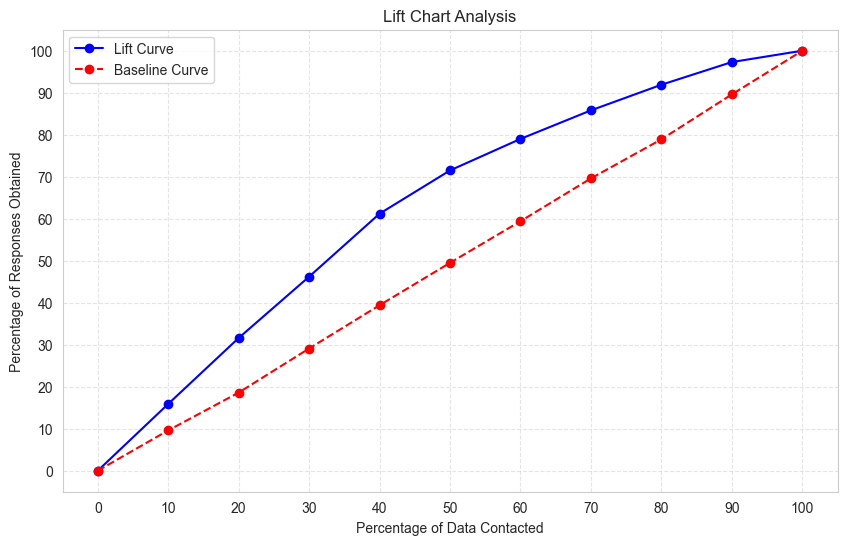

In [152]:
display(data_standardized.head()) 

# train predictor and response 
x_train = data_standardized[['age', 'dist', 'income','gender','marital_status']] # entire data set cleaned and standardized
y_train = data_standardized['target']  


model_standardized = LogisticRegression()   
model_standardized.fit(x_train, y_train)   # train model on entire data set cleaned and standardized

data_standardized['y_probs'] = model_standardized.predict_proba(x_train)[:, 1]  # evaluate for predicted probability of posative outcome on entire data set and append to entire data set 

data_standardized = data_standardized.sample(frac=1).reset_index(drop=True) # scramble the rows 

data_standardized_sorted = data_standardized.sort_values(by='y_probs', ascending=False).reset_index(drop=True)


display(data_standardized.head())
display(data_standardized_sorted.head())

lift_chart(data_standardized_sorted, data_standardized)


Expiriment 2: train on standardized, evaluate on non_standardized 

,id,age,dist,income,gender,marital_status,target,y_probs
0,379,-1.066441,1.632961,0.005883,0,1,0,0.142928
1,2416,-0.818099,1.338336,1.390144,1,1,0,0.138692
2,1908,-0.693928,-1.018667,-0.547821,0,1,0,0.231536
3,1887,0.547779,-0.576729,0.005883,0,1,0,0.270122
4,3161,-0.445587,0.454460,0.005883,0,1,1,0.189055


,id,age,dist,income,gender,marital_status,target,y_probs
0,31,66,15,5,0,1,1,1.0
1,912,78,4,6,0,1,1,1.0
2,234,86,8,2,1,0,1,1.0
3,15,94,4,4,0,0,0,1.0
4,1929,71,29,7,1,1,1,1.0


,id,age,dist,income,gender,marital_status,target,y_probs
0,3918,94,1,2,1,1,0,1.0
1,2394,94,2,2,1,1,1,1.0
2,443,94,3,2,1,1,1,1.0
3,2152,94,0,3,1,1,0,1.0
4,2134,94,0,2,0,1,1,1.0


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,14.4,11.4,3.0
2,30.3,21.8,8.5
3,44.6,31.5,13.1
4,58.4,41.9,16.5
5,69.7,51.7,18.0
6,78.6,61.4,17.2
7,85.4,70.8,14.6
8,90.5,80.2,10.3
9,96.6,89.1,7.5


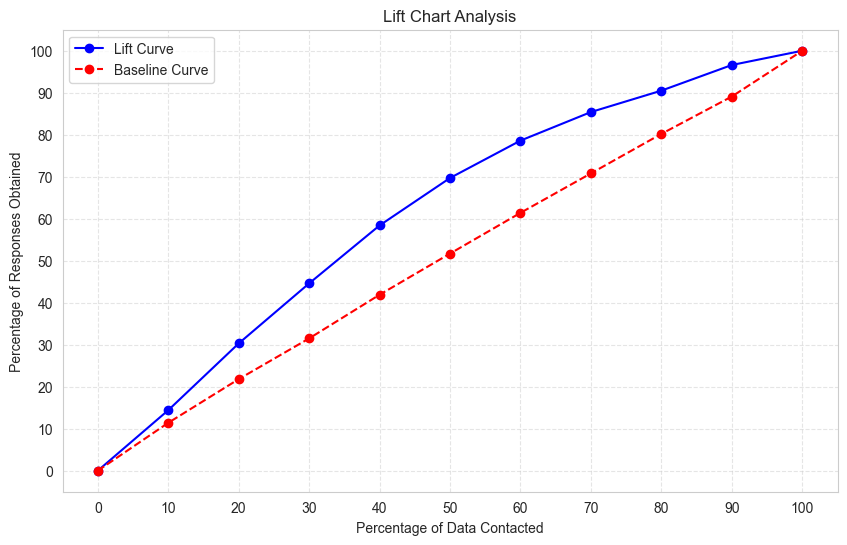

In [153]:
display(data_standardized.head()) 

# train predictor and response 
x_train = data_standardized[['age', 'dist', 'income','gender','marital_status']] # entire data set cleaned and standardized
y_train = data_standardized['target']  

x_test = cleaned_data[['age', 'dist', 'income','gender','marital_status']] # entire data set cleaned and standardized

non_standardized = cleaned_data

model_standardized = LogisticRegression()   
model_standardized.fit(x_train, y_train)   # train model on entire data set cleaned and standardized

non_standardized['y_probs'] = model_standardized.predict_proba(x_test)[:, 1]  # evaluate for predicted probability of posative outcome on entire data set and append to entire data set 

non_standardized = non_standardized.sample(frac=1).reset_index(drop=True) # scramble the rows 

non_standardized_sorted = non_standardized.sort_values(by='y_probs', ascending=False).reset_index(drop=True)


display(non_standardized.head())
display(non_standardized_sorted.head())

lift_chart(non_standardized_sorted, non_standardized)

identical outcome to evaluating on standardized 

Now let's see the lift curve of the model trained on train, evaluated on test - both unstandardized

In [154]:
display(cleaned_data.head())

,id,age,dist,income,gender,marital_status,target,y_probs
0,1,73,4,10,1,0,1,1.0
1,2,89,1,11,1,1,1,1.0
2,3,85,1,2,0,0,1,1.0
3,4,76,2,10,1,1,1,1.0
4,5,76,2,2,1,0,1,1.0


,id,age,dist,income,gender,marital_status,target,y_probs
2427,2428,94,23,6,0,1,0,0.365625
845,846,83,21,6,1,1,0,0.355043
1066,1067,87,7,6,0,0,1,0.257030
3934,3935,93,20,6,1,1,0,0.463239
3528,3529,65,10,6,1,1,0,0.218494


,id,age,dist,income,gender,marital_status,target,y_probs
0,2305,89,3,2,1,1,0,0.575195
1,815,93,0,1,1,0,1,0.563354
2,2111,89,1,3,1,1,1,0.552535
3,242,85,7,1,1,1,1,0.549563
4,886,85,1,2,1,1,1,0.536918


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,16.0,11.0,5.0
2,32.5,20.0,12.5
3,43.0,32.0,11.0
4,59.0,43.5,15.5
5,73.5,51.5,22.0
6,81.5,64.0,17.5
7,87.0,73.0,14.0
8,94.0,81.5,12.5
9,99.5,92.0,7.5


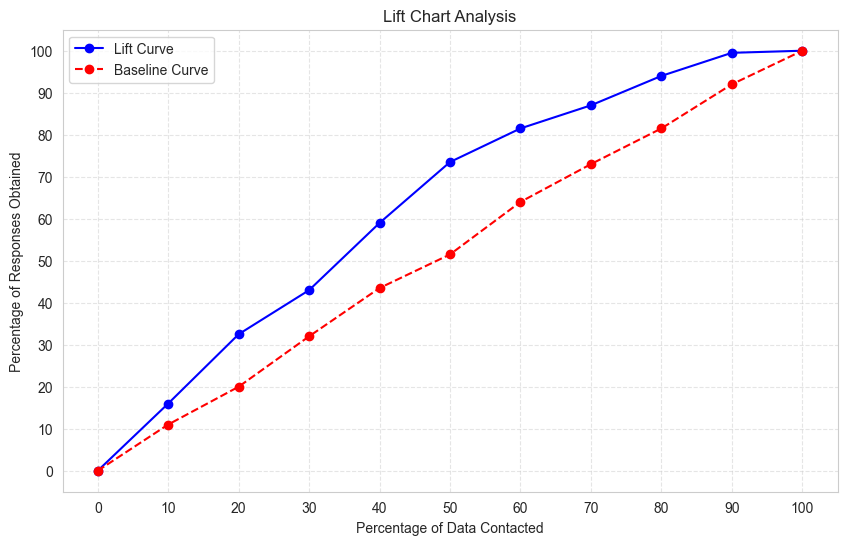

In [155]:
train, test = train_test_split(cleaned_data, test_size=0.2, random_state=123, stratify=cleaned_data["target"])

# train predictor and response 
x_train = train[['age', 'dist', 'income','gender','marital_status']] 
y_train = train['target']  



# test predictor and response
x_test = test[['age', 'dist', 'income','gender','marital_status']] 
y_test = test[['target']] 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 

test['y_probs'] = model.predict_proba(x_test)[:, 1]  # Extract the probabilities for class 1

test_sorted = test.sort_values(by='y_probs', ascending=False).reset_index(drop=True)

display(test.head())
display(test_sorted.head())

lift_chart(test_sorted, test)

The lift curve is constently getting higher yeilds towards the center of the data set, therefore our predicted probability for which the lift data is sorted in order of is fundementally not representative of probability of posative outcomes 

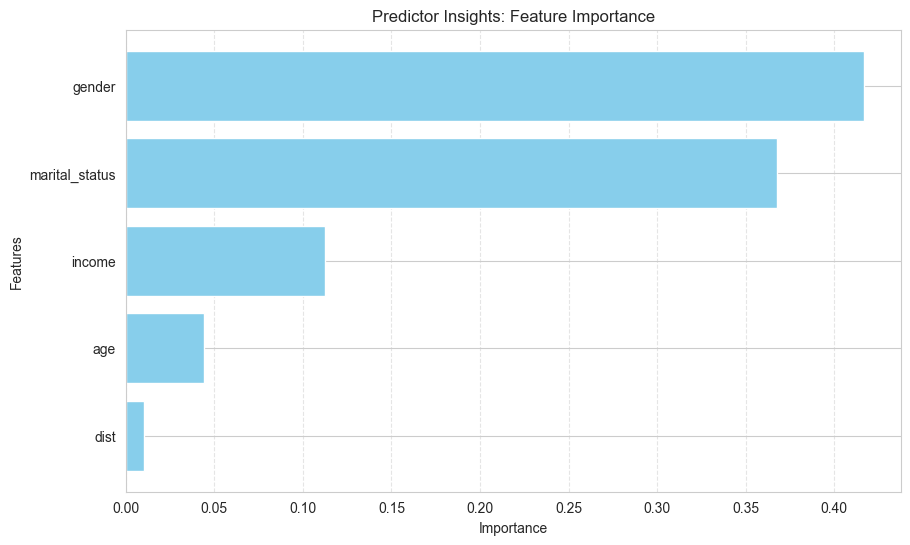

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have a trained model and feature names
# Example: For tree-based models like RandomForest or GradientBoosting
def predictor_insights_graph(model, feature_names):
    """
    Produces a predictor insights graph showing feature importance.

    Parameters:
    - model: Trained model with 'feature_importances_' or 'coef_' attribute.
    - feature_names: List of feature names (must match model input order).
    """
    try:
        # Step 1: Extract Feature Importances
        if hasattr(model, 'feature_importances_'):  # Tree-based models
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):  # Linear models
            importances = np.abs(model.coef_.flatten())  # Use absolute coefficients
        else:
            raise ValueError("Model does not have feature importances or coefficients.")
        
        # Step 2: Create DataFrame for Visualization
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Step 3: Plot the Predictor Insights Graph
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
        plt.gca().invert_yaxis()  # Invert y-axis for descending order
        plt.title('Predictor Insights: Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

# Example Usage
# Replace 'model' with your trained model and 'feature_names' with the list of predictors
# model = trained_model
# feature_names = ['age', 'income', 'gender', 'marital_status', 'dist']
# predictor_insights_graph(model, feature_names)

feature_names = ['age', 'dist', 'income','gender','marital_status']

predictor_insights_graph(model, feature_names)

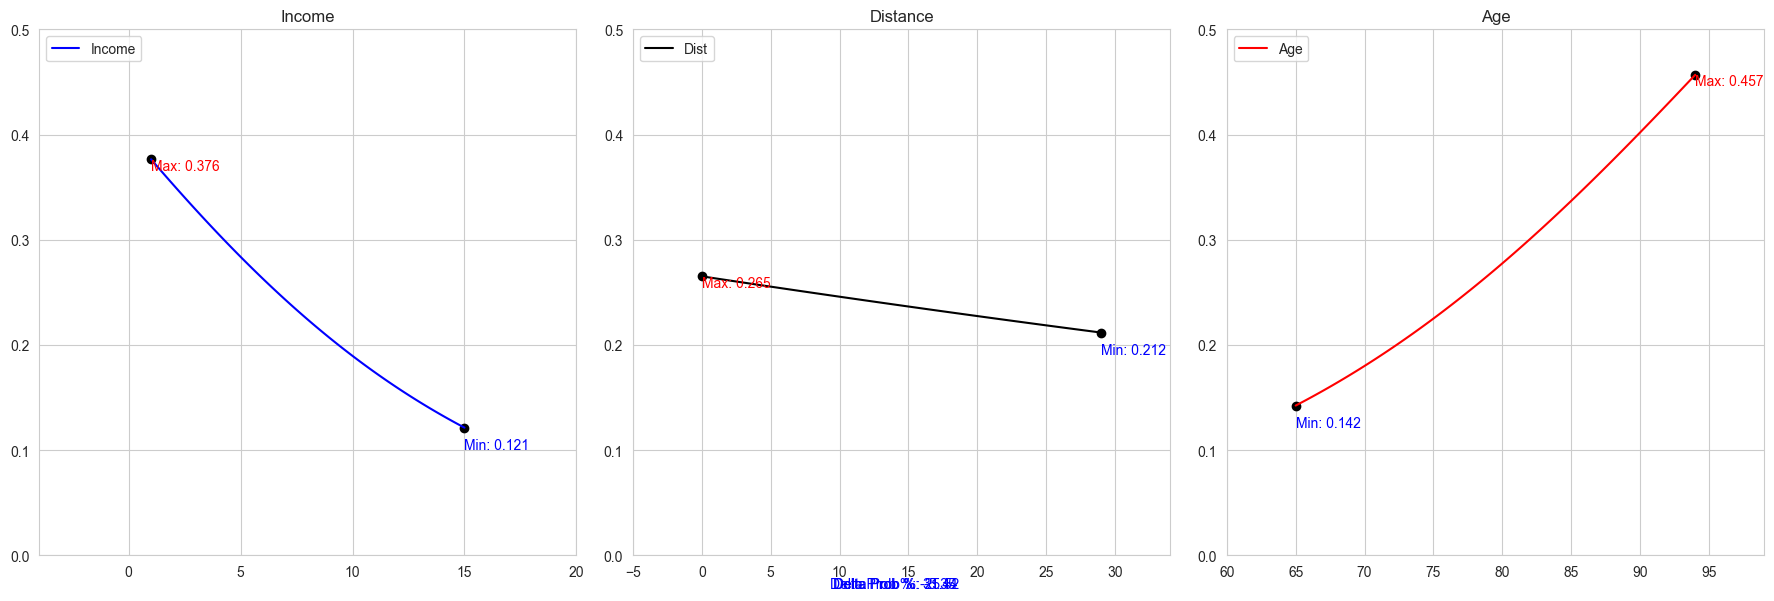

In [157]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def binary_classifier(predictor, clean_data, target_col, color):
    # Define Logistic Regression Model
    X = clean_data[[predictor]]  # Independent variable
    y = clean_data[target_col]   # Target variable
    X = sm.add_constant(X)       # Add intercept

    # Fit logistic regression
    model = sm.Logit(y, X).fit(disp=0)
    intercept, slope = model.params

    # Generate X range for evaluation
    x_eval = np.linspace(clean_data[predictor].min(), clean_data[predictor].max(), 100)

    # Logistic Function
    def prob_by_income(x, intercept, slope):
        log_odds = intercept + slope * x
        odds = np.exp(log_odds)
        probability = odds / (1 + odds)
        return probability

    probabilities = [prob_by_income(x, intercept, slope) for x in x_eval]

    # Plot probabilities
    plt.plot(x_eval, probabilities, color=color, label=predictor.capitalize())
    plt.xlim(x_eval.min() - 5, x_eval.max() + 5)
    plt.ylim(0, 0.5)
    plt.xlabel("")
    plt.legend(loc="upper left")

    # Annotate min and max probabilities
    min_prob = min(probabilities)
    min_x = x_eval[np.argmin(probabilities)]
    max_prob = max(probabilities)
    max_x = x_eval[np.argmax(probabilities)]

    plt.scatter([min_x, max_x], [min_prob, max_prob], color="black")
    plt.text(min_x, min_prob - 0.02, f"Min: {min_prob:.3f}", color="blue")
    plt.text(max_x, max_prob - 0.01, f"Max: {max_prob:.3f}", color="red")

    # Compute delta probability
    delta_value = probabilities[-1] - probabilities[0]
    plt.figtext(0.5, 0.01, f"Delta Prob %: {delta_value*100:.2f}", ha="center", color="blue")

    return delta_value

# Example data (replace with actual data)
# Assuming 'data_income', 'responders_data_sheet' are pandas DataFrames
# and 'income', 'dist', 'age' are columns in these DataFrames

# Plot Probability of Response by Income, Distance, and Age
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.sca(axes[0])
binary_classifier("income", cleaned_data, "target", "blue")
plt.title("Income")

plt.sca(axes[1])
binary_classifier("dist", cleaned_data, "target", "black")
plt.title("Distance")

plt.sca(axes[2])
binary_classifier("age", cleaned_data, "target", "red")
plt.title("Age")




plt.tight_layout()
plt.show()


np.float64(0.04489406271785254)

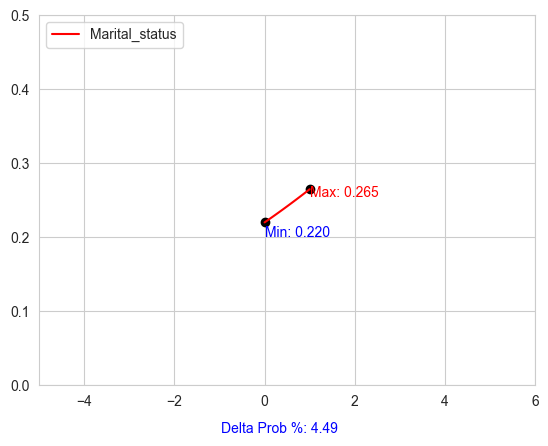

In [158]:
binary_classifier("marital_status", cleaned_data, "target", "red")


np.float64(0.05776052685601929)

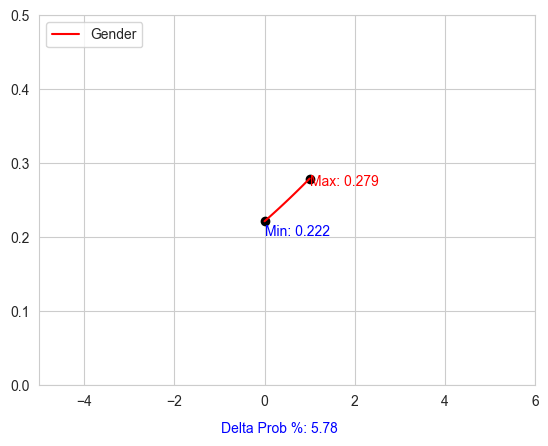

In [159]:
binary_classifier("gender", cleaned_data, "target", "red")

interesting, let's check the coorelation of these 2 

In [160]:
np.corrcoef(cleaned_data['gender'], cleaned_data['marital_status'])

array([[1.        , 0.10795179],
       [0.10795179, 1.        ]])

So these variables are apparently not coorelated, yet they have outragous influence on the coeficients of our model. 

it has to be gender and income (male and increased income). Ok lets play around with removing both and then one or the other variables

,id,age,dist,income,target,y_probs
2427,2428,94,23,6,0,0.393445
845,846,83,21,6,0,0.287256
1066,1067,87,7,6,1,0.353111
3934,3935,93,20,6,0,0.389080
3528,3529,65,10,6,0,0.165326


,id,age,dist,income,target,y_probs
0,815,93,0,1,1,0.543592
1,81,94,1,2,1,0.530220
2,2471,93,10,1,0,0.521570
3,3403,93,1,2,0,0.519030
4,198,93,4,2,1,0.512400


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,14.5,11.0,3.5
2,27.5,20.0,7.5
3,45.0,32.0,13.0
4,56.5,43.5,13.0
5,67.0,51.5,15.5
6,75.5,64.0,11.5
7,87.0,73.0,14.0
8,94.0,81.5,12.5
9,99.0,92.0,7.0


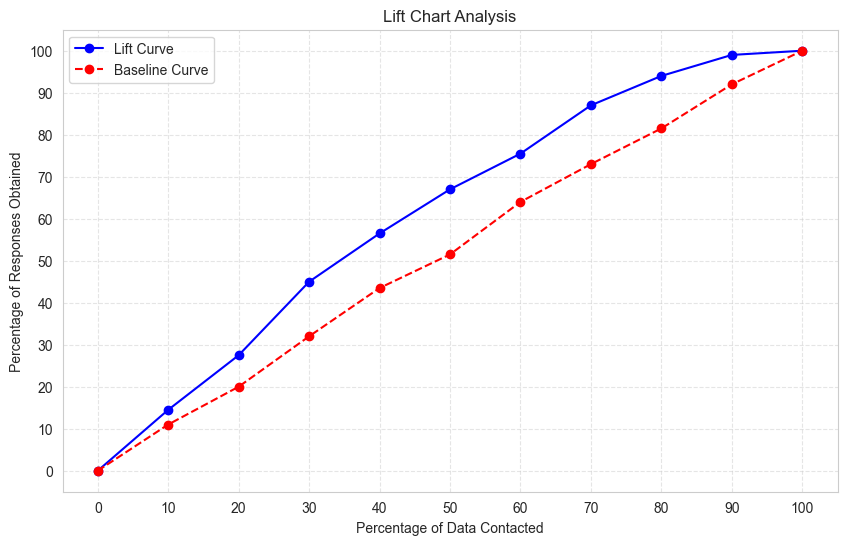

In [161]:
clean_data_2 = cleaned_data.copy()

clean_data_2 = clean_data_2[['id','age', 'dist', 'income','target']] 

train, test = train_test_split(clean_data_2, test_size=0.2, random_state=123, stratify=cleaned_data["target"])

# train predictor and response 
x_train = train[['age', 'dist', 'income']] 
y_train = train['target']  



# test predictor and response
x_test = test[['age', 'dist', 'income']] 
y_test = test[['target']] 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 

test['y_probs'] = model.predict_proba(x_test)[:, 1]  # Extract the probabilities for class 1

test_sorted = test.sort_values(by='y_probs', ascending=False).reset_index(drop=True)

display(test.head())
display(test_sorted.head())

lift_chart(test_sorted, test)

,id,age,dist,income,gender,target,y_probs
2427,2428,94,23,6,0,0,0.342632
845,846,83,21,6,1,0,0.334458
1066,1067,87,7,6,0,1,0.305406
3934,3935,93,20,6,1,0,0.445147
3528,3529,65,10,6,1,0,0.196311


,id,age,dist,income,gender,target,y_probs
0,815,93,0,1,1,1,0.612591
1,3403,93,1,2,1,0,0.586807
2,198,93,4,2,1,1,0.579937
3,3578,94,11,3,1,0,0.550918
4,1322,90,2,2,1,0,0.550786


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,14.5,11.0,3.5
2,30.0,20.0,10.0
3,43.0,32.0,11.0
4,58.0,43.5,14.5
5,69.0,51.5,17.5
6,82.0,64.0,18.0
7,86.5,73.0,13.5
8,95.0,81.5,13.5
9,98.0,92.0,6.0


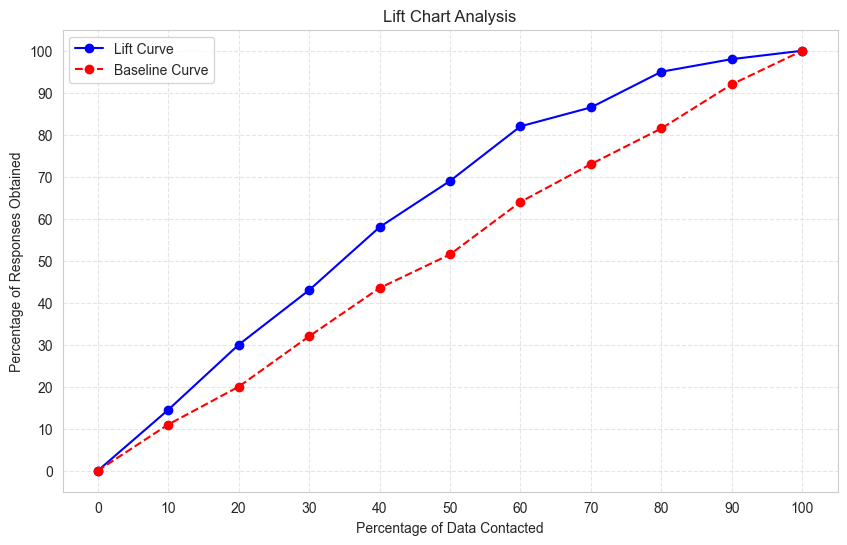

In [162]:
clean_data_2 = cleaned_data.copy()

clean_data_2 = clean_data_2[['id','age', 'dist', 'income','gender','target']] 

train, test = train_test_split(clean_data_2, test_size=0.2, random_state=123, stratify=cleaned_data["target"])

# train predictor and response 
x_train = train[['age', 'dist', 'income','gender']] 
y_train = train['target']  



# test predictor and response
x_test = test[['age', 'dist', 'income','gender']] 
y_test = test[['target']] 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 

test['y_probs'] = model.predict_proba(x_test)[:, 1]  # Extract the probabilities for class 1

test_sorted = test.sort_values(by='y_probs', ascending=False).reset_index(drop=True)

display(test.head())
display(test_sorted.head())

lift_chart(test_sorted, test)

,id,age,dist,income,marital_status,target,y_probs
2427,2428,94,23,6,1,0,0.416459
845,846,83,21,6,1,0,0.312306
1066,1067,87,7,6,0,1,0.290842
3934,3935,93,20,6,1,0,0.413256
3528,3529,65,10,6,1,0,0.189611


,id,age,dist,income,marital_status,target,y_probs
0,2471,93,10,1,1,0,0.570778
1,3270,92,4,2,1,1,0.548404
2,3694,91,1,2,1,1,0.545135
3,2533,93,0,3,1,1,0.542252
4,2878,90,5,2,1,1,0.524615


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,17.5,11.0,6.5
2,29.5,20.0,9.5
3,46.0,32.0,14.0
4,58.5,43.5,15.0
5,69.0,51.5,17.5
6,77.5,64.0,13.5
7,88.0,73.0,15.0
8,95.0,81.5,13.5
9,99.0,92.0,7.0


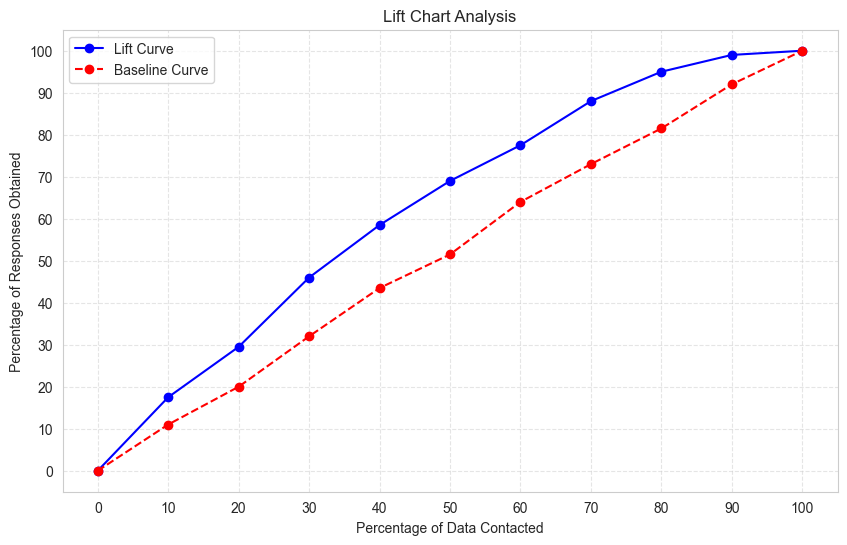

In [163]:
clean_data_2 = cleaned_data.copy()

clean_data_2 = clean_data_2[['id','age', 'dist', 'income','marital_status','target']] 

train, test = train_test_split(clean_data_2, test_size=0.2, random_state=123, stratify=cleaned_data["target"])

# train predictor and response 
x_train = train[['age', 'dist', 'income','marital_status']] 
y_train = train['target']  



# test predictor and response
x_test = test[['age', 'dist', 'income','marital_status']] 
y_test = test[['target']] 

model = LogisticRegression()
model.fit(x_train, y_train) # train the model on predictor and response from training data 

test['y_probs'] = model.predict_proba(x_test)[:, 1]  # Extract the probabilities for class 1

test_sorted = test.sort_values(by='y_probs', ascending=False).reset_index(drop=True)

display(test.head())
display(test_sorted.head())

lift_chart(test_sorted, test)

,id,age,dist,income,gender,marital_status,target,y_probs
0,379,-1.066441,1.632961,0.005883,0,1,0,0.142928
1,2416,-0.818099,1.338336,1.390144,1,1,0,0.138692
2,1908,-0.693928,-1.018667,-0.547821,0,1,0,0.231536
3,1887,0.547779,-0.576729,0.005883,0,1,0,0.270122
4,3161,-0.445587,0.454460,0.005883,0,1,1,0.189055


/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,id,age,dist,income,gender,marital_status,target,y_probs
0,379,-1.066441,1.632961,0.005883,0,1,0,0.142928
1,2416,-0.818099,1.338336,1.390144,1,1,0,0.138692
2,1908,-0.693928,-1.018667,-0.547821,0,1,0,0.231536
3,1887,0.547779,-0.576729,0.005883,0,1,0,0.270122
4,3161,-0.445587,0.454460,0.005883,0,1,1,0.189055


,id,age,dist,income,gender,marital_status,target,y_probs
0,3918,2.161999,-1.018667,-1.378378,1,1,0,0.647598
1,2394,2.161999,-0.871354,-1.378378,1,1,1,0.644685
2,443,2.161999,-0.724042,-1.378378,1,1,1,0.641762
3,863,1.665316,-0.871354,-1.655230,1,1,0,0.627253
4,461,1.913658,-1.018667,-1.378378,1,1,1,0.626036


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,15.9,11.8,4.1
2,31.6,22.6,9.0
3,46.2,31.3,14.9
4,61.2,41.0,20.2
5,71.5,49.6,21.9
6,79.0,59.7,19.3
7,85.8,69.7,16.1
8,91.9,79.9,12.0
9,97.3,90.9,6.4


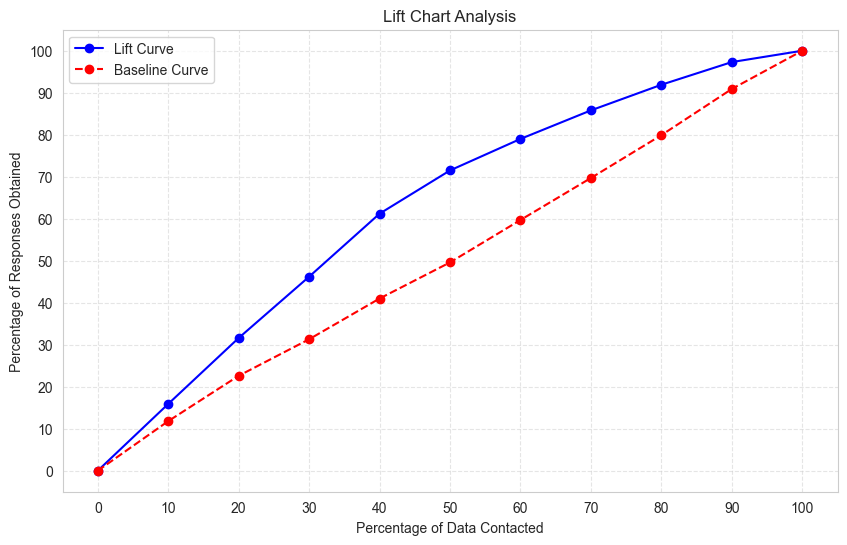

In [164]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
display(data_standardized.head()) 

data_standardized_2 = cleaned_data.copy()

# train predictor and response 
x_train = data_standardized_2[['age', 'dist', 'income','gender','marital_status']] # entire data set cleaned and standardized
y_train = data_standardized_2['target']  


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


model_standardized = LogisticRegression()
model_standardized.fit(x_resampled, y_resampled)

data_standardized_2['y_probs'] = model_standardized.predict_proba(x_train)[:, 1]  # evaluate for predicted probability of posative outcome on entire data set and append to entire data set 

data_standardized_2 = data_standardized_2.sample(frac=1).reset_index(drop=True) # scramble the rows 

data_standardized_2_sorted = data_standardized.sort_values(by='y_probs', ascending=False).reset_index(drop=True)


display(data_standardized.head())
display(data_standardized_sorted.head())

lift_chart(data_standardized_2_sorted, data_standardized_2)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,id,age,dist,income,gender,marital_status,target,y_probs
0,2057,81,16,11,1,1,0,0.380750
1,3848,68,17,7,1,0,0,0.330785
2,3087,82,1,7,1,1,1,0.572764
3,51,85,12,4,0,1,0,0.629983
4,3594,70,1,10,1,1,0,0.363022


,id,age,dist,income,gender,marital_status,target,y_probs
0,3918,2.161999,-1.018667,-1.378378,1,1,0,0.647598
1,2394,2.161999,-0.871354,-1.378378,1,1,1,0.644685
2,443,2.161999,-0.724042,-1.378378,1,1,1,0.641762
3,863,1.665316,-0.871354,-1.655230,1,1,0,0.627253
4,461,1.913658,-1.018667,-1.378378,1,1,1,0.626036


Lift Chart Data:


,Lift Curve,Baseline Curve,diff
0,0.0,0.0,0.0
1,16.0,8.9,7.1
2,30.4,18.5,11.9
3,44.4,28.7,15.7
4,56.9,39.5,17.4
5,66.9,50.0,16.9
6,75.8,60.3,15.5
7,83.5,70.0,13.5
8,91.1,80.3,10.8
9,96.8,89.8,7.0


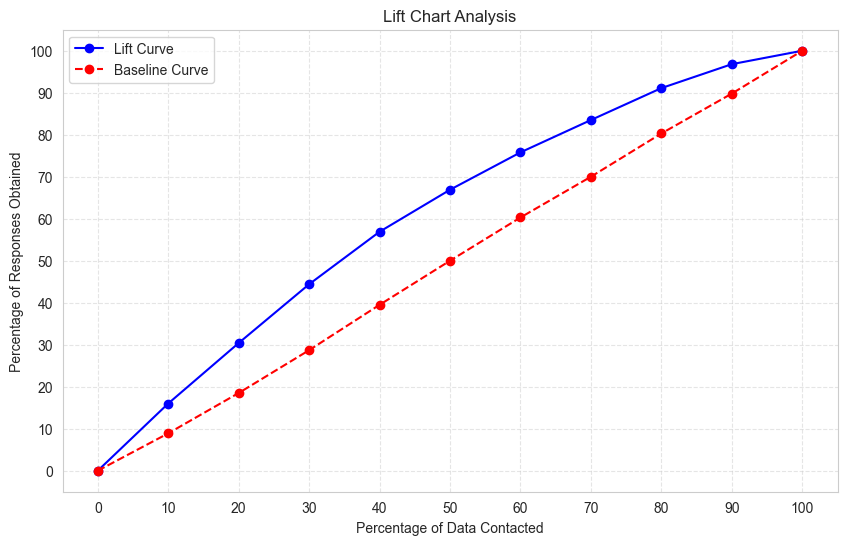

In [165]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data_standardized_2 = cleaned_data.copy()

# train predictor and response 
x_train = data_standardized_2[['age', 'dist', 'income','gender','marital_status']] # entire data set cleaned and standardized
y_train = data_standardized_2['target']  


smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


model_standardized = LogisticRegression()
model_standardized.fit(x_resampled, y_resampled)

data_standardized_2['y_probs'] = model_standardized.predict_proba(x_train)[:, 1]  # evaluate for predicted probability of posative outcome on entire data set and append to entire data set 

data_standardized_2 = data_standardized_2.sample(frac=1).reset_index(drop=True) # scramble the rows 

data_standardized_2_sorted = data_standardized_2.sort_values(by='y_probs', ascending=False).reset_index(drop=True)


display(data_standardized_2.head())
display(data_standardized_sorted.head())

lift_chart(data_standardized_2_sorted, data_standardized_2)